In [43]:
import pandas as pd
import matplotlib.pyplot as plt

In [44]:
# Python version
import sys
print(sys.version)

3.13.5 | packaged by Anaconda, Inc. | (main, Jun 12 2025, 11:23:37) [Clang 14.0.6 ]


In [45]:
import os
print(os.getcwd())

/Users/krescenskok/anaconda_projects/Task1


## Data Profiling

In [46]:
# import the file

file_name = "Employee Turnover Dataset.csv"

df = pd.read_csv(file_name)

# Print out the number of rows
print(df.shape[0])

10199


In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10199 entries, 0 to 10198
Data columns (total 16 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   EmployeeNumber                10199 non-null  int64  
 1   Age                           10199 non-null  int64  
 2   Tenure                        10199 non-null  int64  
 3   Turnover                      10199 non-null  object 
 4   HourlyRate                    10199 non-null  object 
 5   HoursWeekly                   10199 non-null  int64  
 6   CompensationType              10199 non-null  object 
 7   AnnualSalary                  10199 non-null  float64
 8   DrivingCommuterDistance       10199 non-null  int64  
 9   JobRoleArea                   10199 non-null  object 
 10  Gender                        10199 non-null  object 
 11  MaritalStatus                 10199 non-null  object 
 12  NumCompaniesPreviouslyWorked  9534 non-null   float64
 13  A

In [48]:
for i in df.columns:
    print(i)
    # print(df[i])
    print(df[i].unique())
    print("")

EmployeeNumber
[    1     2     3 ... 10098 10099 10100]

Age
[28 33 22 23 40 45 34 37 24 30 38 47 55 59 29 35 44 54 36 32 41 56 21 27
 50 31 46 48 39 57 52 53 58 49 42 60 43 61 26 51 25]

Tenure
[ 6  2  1 16  9  3  8  4 20 10  7 15  5 18 17 14 13 19 12 11]

Turnover
['Yes' 'No']

HourlyRate 
['$24.37 ' '$22.52 ' '$88.77 ' ... '$30.86 ' '$95.07 ' '$93.05 ']

HoursWeekly
[40]

CompensationType
['Salary']

AnnualSalary
[ 50689.6  46841.6 284641.6 ... 337745.6 164902.4 333544. ]

DrivingCommuterDistance
[  89   35   12    0   76   15    2   36   60   14   75    5  910   28
   -4   33   79   50   13   57   82    4   42   -5   64   -8   77    1
   24   67   41   62   47   -7   31   32   56   22   51   58   34   37
   16   26   74  -10   -2   84   44   61   87   46   52   73   53   85
   66   80   55  950   70   17  250  -12   43   49   81   86   -3   48
   45   68   10    7   20   38   21  -11   65   78   69   -6   25   54
    8   83   27    9   -9  -14  -13   39   40   29   71   30   -1   

In [49]:
# Removes leading/trailing spaces
df.columns = df.columns.str.strip() 
# Remove dollar signs and spaces before converting to numeric
df["HourlyRate"] = df["HourlyRate"].str.replace('$', '').str.strip()
df["HourlyRate"] = pd.to_numeric(df["HourlyRate"])

## Data Cleaning and Plan

#### Identify duplicate records

In [50]:
duplicate_count = df.duplicated().sum()
print(duplicate_count)

99


#### Identify Missing Values

In [51]:
print(df.isnull().sum())

EmployeeNumber                     0
Age                                0
Tenure                             0
Turnover                           0
HourlyRate                         0
HoursWeekly                        0
CompensationType                   0
AnnualSalary                       0
DrivingCommuterDistance            0
JobRoleArea                        0
Gender                             0
MaritalStatus                      0
NumCompaniesPreviouslyWorked     665
AnnualProfessionalDevHrs        1969
PaycheckMethod                     0
TextMessageOptIn                2266
dtype: int64


#### Identify Inconsistent Entries and Formatting Errors
- Looking at the histograms, it reveals columns that contain negative values when it doesn't make sense

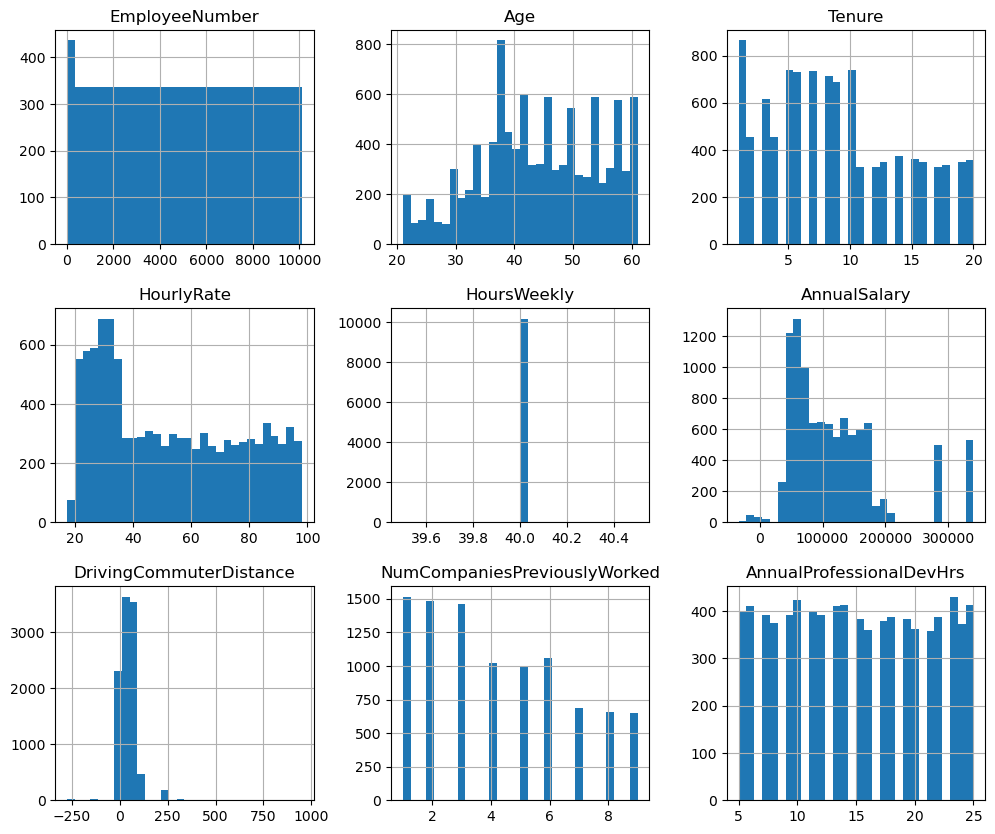

In [10]:
# Create historgrams
axes = df.select_dtypes('number').hist(figsize=(12, 10), bins=30)

In [52]:
df['Turnover'].value_counts()

Turnover
No     5509
Yes    4690
Name: count, dtype: int64

Inconsistent entries for the category names

In [53]:
df['JobRoleArea'].value_counts()

JobRoleArea
Research                  2025
Sales                     2007
Marketing                 1105
Manufacturing             1039
Laboratory                1021
Healthcare                1008
Human Resources            909
Information Technology     857
InformationTechnology       80
Information_Technology      56
HumanResources              51
Human_Resources             41
Name: count, dtype: int64

In [54]:
df['Gender'].value_counts()

Gender
Female                  5812
Male                    4232
Prefer Not to Answer     155
Name: count, dtype: int64

In [55]:
df['MaritalStatus'].value_counts()

MaritalStatus
Married     3439
Single      3422
Divorced    3338
Name: count, dtype: int64

Inconsistent entries for the category names

In [56]:
df['PaycheckMethod'].value_counts()

PaycheckMethod
Mail Check        4986
Mailed Check      2441
DirectDeposit      992
Direct_Deposit     958
Mail_Check         547
Direct Deposit     226
MailedCheck         49
Name: count, dtype: int64

In [57]:
df['TextMessageOptIn'].value_counts()

TextMessageOptIn
Yes    7390
No      543
Name: count, dtype: int64

Formatting errors where the calculation based on the data dictionary is off for quite a few records

In [58]:
df['totalAmount'] = df['HourlyRate'] * df['HoursWeekly'] * 52

mask = df['AnnualSalary'] != round(df['totalAmount'], 2)

print(len(df[mask]))
print(df.loc[mask, ['AnnualSalary', 'totalAmount']])

# drop 'totalAmount' column
df = df.drop(columns = ['totalAmount'])

2149
       AnnualSalary  totalAmount
4          284641.6     184641.6
5          284641.6     184641.6
16         284080.0     184080.0
17         284080.0     184080.0
22         281417.6     181417.6
...             ...          ...
10180      285764.8     185764.8
10181      285764.8     185764.8
10182      283601.6     183601.6
10183      283601.6     183601.6
10198      148075.2     148366.4

[2149 rows x 2 columns]


#### Identify Outliers

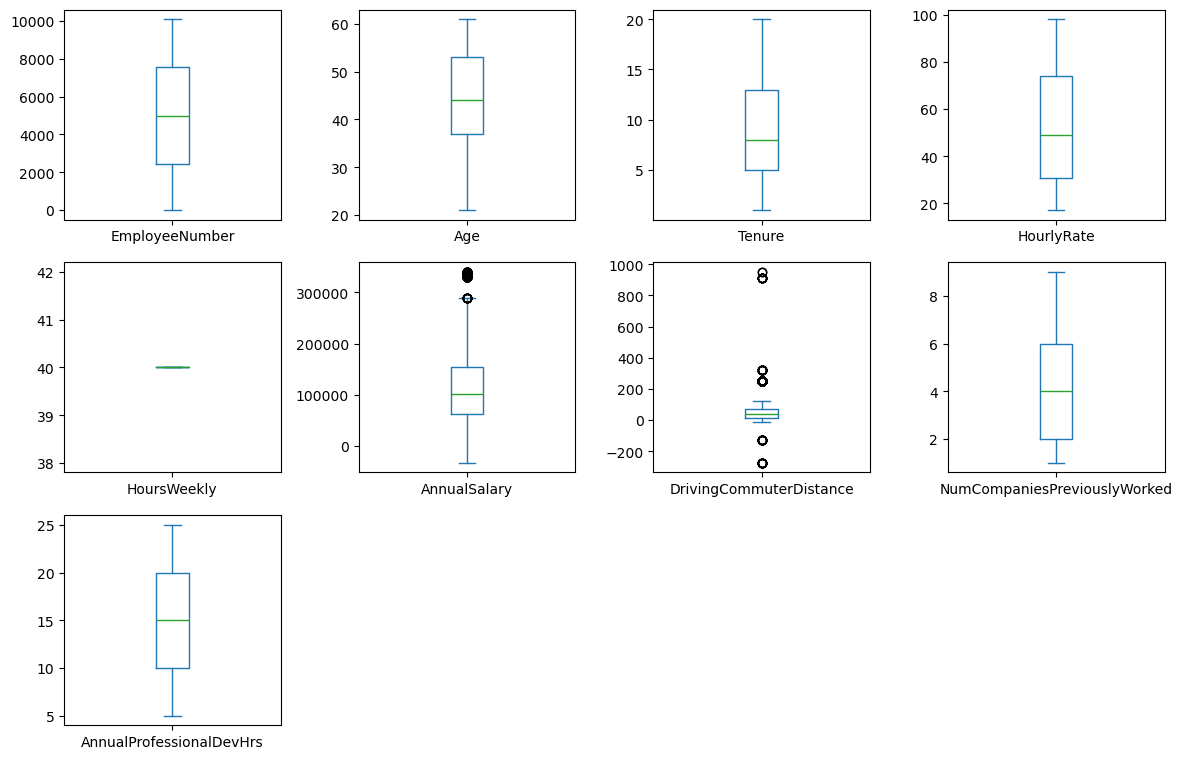

In [59]:
numeric_cols = df.select_dtypes(include='number')

# Create boxplots
numeric_cols.plot(kind='box', subplots=True, layout=(4, 4), figsize=(12, 10), sharex=False, sharey=False)
plt.tight_layout()
plt.show()

(0.0, 350000.0)

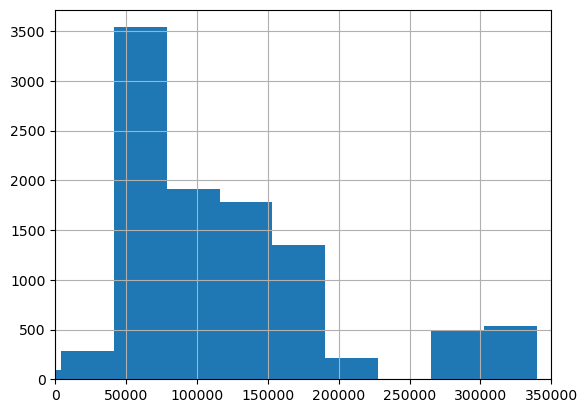

In [60]:
df['AnnualSalary'].hist()
plt.xlim(0,350000)

In [20]:
filtered_df = df[df['AnnualSalary'] > 300000]
print(filtered_df)

       EmployeeNumber  Age  Tenure Turnover  HourlyRate  HoursWeekly  \
166               167   41       3       No       91.85           40   
167               168   58      16       No       91.85           40   
203               204   41       2       No       94.94           40   
206               207   49       7       No       95.60           40   
222               223   54      11       No       91.54           40   
...               ...  ...     ...      ...         ...          ...   
10029           10030   44       5       No       92.48           40   
10037           10038   56      16      Yes       91.96           40   
10075           10076   44      13       No       92.61           40   
10087           10088   47      17      Yes       95.07           40   
10094           10095   38       9       No       93.05           40   

      CompensationType  AnnualSalary  DrivingCommuterDistance  \
166             Salary      331048.0                       -5   
167  

(0.0, 1000.0)

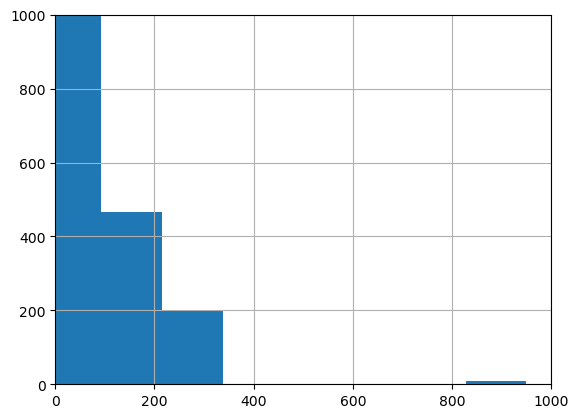

In [61]:
df['DrivingCommuterDistance'].hist()
plt.xlim(0, 1000) 
plt.ylim(0, 1000) 

## Correct Data Quality Issues

#### Handle duplicated rows

In [62]:
df = df.drop_duplicates()
len(df)

10100

### Handle null values
- Notice how there are no values of '0' for this column
- By default, I am assuming that a null value means that the employee did not work at any previous companies

In [63]:
filtered_df = df[df['NumCompaniesPreviouslyWorked'] == 0]
print(filtered_df)

Empty DataFrame
Columns: [EmployeeNumber, Age, Tenure, Turnover, HourlyRate, HoursWeekly, CompensationType, AnnualSalary, DrivingCommuterDistance, JobRoleArea, Gender, MaritalStatus, NumCompaniesPreviouslyWorked, AnnualProfessionalDevHrs, PaycheckMethod, TextMessageOptIn]
Index: []


In [64]:
df['NumCompaniesPreviouslyWorked'] = df['NumCompaniesPreviouslyWorked'].fillna(0)
# Check to see if there are still null values
df['NumCompaniesPreviouslyWorked'].isna().sum()

np.int64(0)

- Notice how there are no values of '0' for this column
- By default, I am assuming that a null value means that the employee did not have any annual professional development hours

In [65]:
filtered_df = df[df['AnnualProfessionalDevHrs'] == 0]
print(filtered_df)

Empty DataFrame
Columns: [EmployeeNumber, Age, Tenure, Turnover, HourlyRate, HoursWeekly, CompensationType, AnnualSalary, DrivingCommuterDistance, JobRoleArea, Gender, MaritalStatus, NumCompaniesPreviouslyWorked, AnnualProfessionalDevHrs, PaycheckMethod, TextMessageOptIn]
Index: []


In [66]:
df['AnnualProfessionalDevHrs'] = df['AnnualProfessionalDevHrs'].fillna(0)
# Check to see if there are still null values
df['AnnualProfessionalDevHrs'].isna().sum()

np.int64(0)

By default, I'm assuming if the value is null, then the employee did not opt in to text messages

In [67]:
df['TextMessageOptIn'] = df['TextMessageOptIn'].fillna('No')
df['TextMessageOptIn'].isna().sum()

np.int64(0)

In [68]:
df.isna().sum()

EmployeeNumber                  0
Age                             0
Tenure                          0
Turnover                        0
HourlyRate                      0
HoursWeekly                     0
CompensationType                0
AnnualSalary                    0
DrivingCommuterDistance         0
JobRoleArea                     0
Gender                          0
MaritalStatus                   0
NumCompaniesPreviouslyWorked    0
AnnualProfessionalDevHrs        0
PaycheckMethod                  0
TextMessageOptIn                0
dtype: int64

### Fixing Inconsistencies and Formatting Errors
- Fill in negative values of driving distance with the median value
- Calculate the correct annual salary amount for the employees based on the hourly rate and hours weekly, and fix all the values where the values didn't match up
- Fix the category names to be the same

In [69]:
mask = df['DrivingCommuterDistance'] < 0
df.loc[mask, 'DrivingCommuterDistance'] = df['DrivingCommuterDistance'].median()

In [70]:
df['totalAmount'] = df['HourlyRate'] * df['HoursWeekly'] * 52

mask = df['AnnualSalary'] != round(df['totalAmount'], 2)

print(len(df[mask]))
print(df.loc[mask, ['AnnualSalary', 'totalAmount']])
df.loc[mask, 'AnnualSalary'] = df.loc[mask, 'HourlyRate'] * 52 * df.loc[mask, 'HoursWeekly']


2122
       AnnualSalary  totalAmount
4          284641.6     184641.6
5          284641.6     184641.6
16         284080.0     184080.0
17         284080.0     184080.0
22         281417.6     181417.6
...             ...          ...
10085       64288.8      64188.8
10086       40955.2      70075.2
10087      337745.6     197745.6
10094      333544.0     193544.0
10097       37960.0      58760.0

[2122 rows x 2 columns]


In [71]:
mask = round(df['AnnualSalary'],2) != round(df['totalAmount'], 2)
print(df.loc[mask, ['AnnualSalary', 'totalAmount']])
df = df.drop(columns=['totalAmount'])

Empty DataFrame
Columns: [AnnualSalary, totalAmount]
Index: []


In [72]:
df['JobRoleArea'] = df['JobRoleArea'].replace({
    'Human Resources': 'HumanResources',
    'HumanResources': 'HumanResources',
    'Human_Resources': 'HumanResources'
})

df['JobRoleArea'] = df['JobRoleArea'].replace({
    'Information Technology': 'InformationTechnology',
    'InformationTechnology': 'InformationTechnology',
    'Information_Technology': 'InformationTechnology'
})

In [73]:
df['JobRoleArea'].value_counts()

JobRoleArea
Research                 2005
Sales                    1988
Marketing                1093
Manufacturing            1031
Laboratory               1007
Healthcare               1002
HumanResources            995
InformationTechnology     979
Name: count, dtype: int64

In [74]:
df['PaycheckMethod'] = df['PaycheckMethod'].replace({
    'Mail Check': 'MailedCheck',
    'Mailed Check': 'MailedCheck',
    'Mail_Check': 'MailedCheck',
    'MailedCheck': 'MailedCheck'
})

df['PaycheckMethod'] = df['PaycheckMethod'].replace({
    'DirectDeposit': 'DirectDeposit',
    'Direct_Deposit': 'DirectDeposit',
    'Direct Deposit': 'DirectDeposit'
})

In [35]:
df['PaycheckMethod'].value_counts()

PaycheckMethod
MailedCheck      7938
DirectDeposit    2162
Name: count, dtype: int64

### Fixing Outliers

In [75]:
Q1 = df['AnnualSalary'].quantile(0.25) 

Q3 = df['AnnualSalary'].quantile(0.75) 
IQR = Q3 - Q1
upper_threshold = Q3 + 1.5 * IQR
print(upper_threshold)

287323.4


In [76]:
mask = df['AnnualSalary'] > 287323.4
df.loc[mask, 'AnnualSalary'] = df.loc[mask, 'HourlyRate'] * 52 * df.loc[mask, 'HoursWeekly']


In [77]:
outliers = df[df['AnnualSalary'] > upper_threshold]
print(outliers)

Empty DataFrame
Columns: [EmployeeNumber, Age, Tenure, Turnover, HourlyRate, HoursWeekly, CompensationType, AnnualSalary, DrivingCommuterDistance, JobRoleArea, Gender, MaritalStatus, NumCompaniesPreviouslyWorked, AnnualProfessionalDevHrs, PaycheckMethod, TextMessageOptIn]
Index: []


In [78]:
filtered = df[df['DrivingCommuterDistance'] > 800]
print(len(filtered))

6


In [79]:
median = df['DrivingCommuterDistance'].median()

mask = df['DrivingCommuterDistance'] > 800

df.loc[mask, 'DrivingCommuterDistance'] = median

In [80]:
filtered = df[df['DrivingCommuterDistance'] > 800]
print(len(filtered))

0


### Save Cleaned DF to CSV

In [81]:
df.to_csv('cleaned_df.csv', index=False)